In [ ]:
# !pip install tensorflow_hub --user

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import PIL.Image

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    
    new_shape = tf.cast(shape * scale, tf.int32)
    
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img
 
def imshow(image, title = None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis = 0)
    
    plt.imshow(image)
    if title:
        plt.title(title)
        
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype = np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [3]:
path_target_image = "target.jpg"
path_style_image = "style.jpg" 

In [4]:
content_path = tf.keras.utils.get_file(path_target_image, 
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

style_path = tf.keras.utils.get_file(path_style_image,
                                     'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

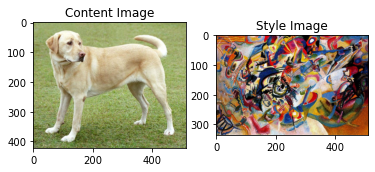

In [5]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [6]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

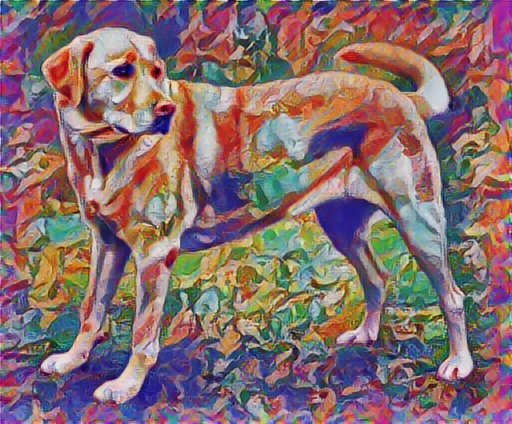

In [7]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

### 정리

In [ ]:
# hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

In [14]:
content_image = load_img("imgs/content_01_cat.png")
style_image   = load_img("imgs/style_04_sky_glass.jpg")

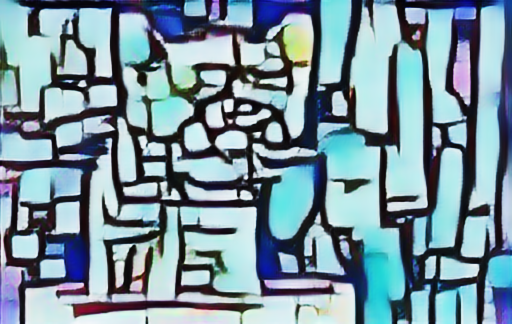

In [15]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)